## Ex 1
Develop a method to generate a random variable such as it's probability distribution function is:


a)
$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{x-2}{2} & if & 2 \leq x \leq 3 \\
             \\ \cfrac{2-x/3}{2} & if & 3 \leq x \leq 6 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$

b)
$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{6(x+3)}{35} & if & 0 \leq x \leq 1 \\
             \\ \cfrac{6x^{2}}{35} & if & 1 \leq x \leq 2 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$

c)
$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{exp(4x)}{4} & if &  - \infty < x \leq 0 \\
             \\ \cfrac{1}{4} & if & 0 \leq x \leq \cfrac{15}{4} \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


### a
We will make a inverse transform generator. For that, first we have to find the cumulative distribution function.  
We say a random variable is continuous if and only if exists a funcion f such that for every subset C 
$$ P(X \in C) = \int_{C} f(x)dx $$
If the variable is continuous, its cumulative distribution function is:
$$ F(a) = P(X \leq a) = \int_{- \infty}^{a} f(x)dx $$


$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{x-2}{2} & if & 2 \leq x \leq 3 \\
             \\ \cfrac{2-x/3}{2} & if & 3 \leq x \leq 6 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$



If $ 2 \leq x \leq 3 $:

$$
F(X \leq x) = \int_{2}^{x} \cfrac{y-2}{2}dy = \cfrac{x^{2}}{4} -x + 1
$$



If $ 3 \leq x \leq 6 $:

$$
F(X \leq x) = \int_{2}^{3} \cfrac{y-2}{2}dy + \int_{3}^{x} \cfrac{2-y/3}{2}dy =-\cfrac{x^{2}}{12} + x - 2
$$



Summing up




$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             \cfrac{x^{2}}{4} -x + 1 & if & 2 \leq x \leq 3 
             \\ -\cfrac{x^{2}}{12} + x - 2 & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utilities.distPlot import plot

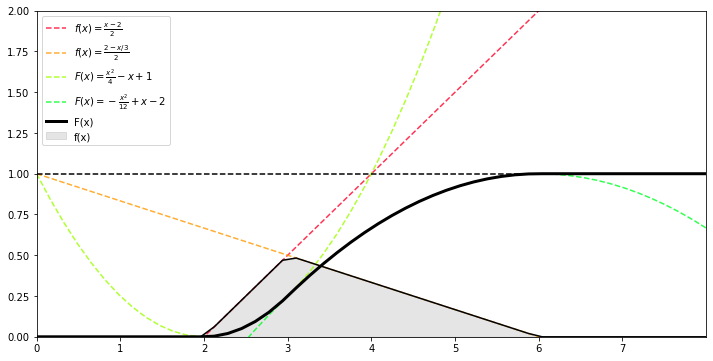

In [3]:
labels = [
    r'$f(x)= \frac{x-2}{2}$',
    r'$f(x)= \frac{2-x/3}{2}$',
    r'$F(x)= \frac{x^{2}}{4} -x + 1$',
    r'$F(x)= - \frac{x^{2}}{12} + x - 2$'
          ]
# This is just to give something to conds. Really dirty 
x = np.linspace(0,8)

# The probability density functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Conditions for each of the pieces
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

# Cumulative distribution functions
cdf = [0,
       lambda x: (x**2)/4-x+1,
       lambda x: -(x**2)/12+x-2,
       1]

x_lim = (0,8)
y_lim = (0,2)
fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


Now we can make our inverse transform generator as it follows:
```
def inverseTransform(y):
    u = random()
    if u < F(2):
        return inverseF(u)
    if u < F(3):
        return inverseF(u)
    else:
        return inverseF(u)
```

So for the inverse transform generator we need the inverse of our cummulative function:

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 \pm 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 \pm 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$

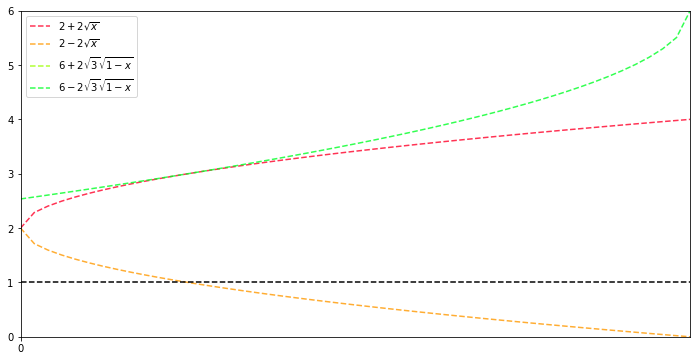

In [4]:
from math import sqrt
labels = [r'$2 + 2\sqrt{x}$',
          r'$2 - 2\sqrt{x}$',
          r'$6 + 2\sqrt{3}\sqrt{1-x}$',
          r'$6 - 2\sqrt{3}\sqrt{1-x}$']

funcs = [lambda x: 2+2*np.sqrt(x),
         lambda x: 2-2*np.sqrt(x),
         lambda x: 6+2*np.sqrt(3)*np.sqrt(1-x),
         lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x) 
        ]
x_lim = (0,1)
y_lim = (0,6)
plot(funcs,x_lim,y_lim,labels,dist=False)

We can observe that the only functions that fullfill our requirements: domain in (0,1) and image in (2,3) and (3,6) respectively are $ f(x) = 2 + 2\sqrt{x}$ and $ f(x) = 6-2\sqrt{3}\sqrt{1-x}$
so those are the ones we will use in our generator.

$$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 2 \\
             2 + 2\sqrt{x} & if & 2 \leq x \leq 3 
             \\ 6 - 2\sqrt{3}\sqrt{1-x} & if & 3 \leq x \leq 6 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$$


In [5]:
from cvm.cvmgen import InverseTransform
import numpy as np

In [6]:
# Probability distribution functions
pdf = [0,
         lambda x: (x-2)/2,
         lambda x: (2-x/3)/2,
         0]

# Linear space where we the conditions are applied
x = np.linspace(0,8)
conds = [x<2,
        (x>2) & (x<3),
        (x>3) & (x<6)]

cdfInverse = [lambda x: 2+2*np.sqrt(x),
              lambda x: 6-2*np.sqrt(3)*np.sqrt(1-x)]

# Limit values of the piece-wise function
lims = [3,6]

# Cummulative distribution applied to each of the limits
# in lims
cdf = [lambda x: (x**2)/4-x+1,
          lambda x: -(x**2)/12+x-2]


exAgen = InverseTransform(cdfInverse,cdf,lims,pdf,conds)

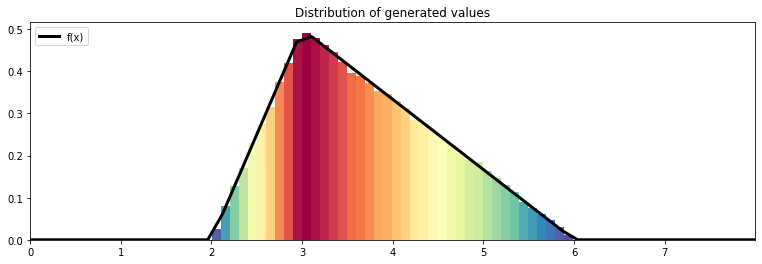

In [7]:
exAgen.plot(100000,(0,8),figsize=(13,4),bins=40)

In [8]:
exAgen.limits

[0.25, 1.0]

## b

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{6(x+3)}{35} & if & 0 \leq x \leq 1 \\
             \\ \cfrac{6x^{2}}{35} & if & 1 \leq x \leq 2 \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


$
F(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             \cfrac{3x^{2}+18}{35} & if & 0 \leq x \leq 1 
             \\ \cfrac{6}{10}+\cfrac{2x^{3}-2}{35} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


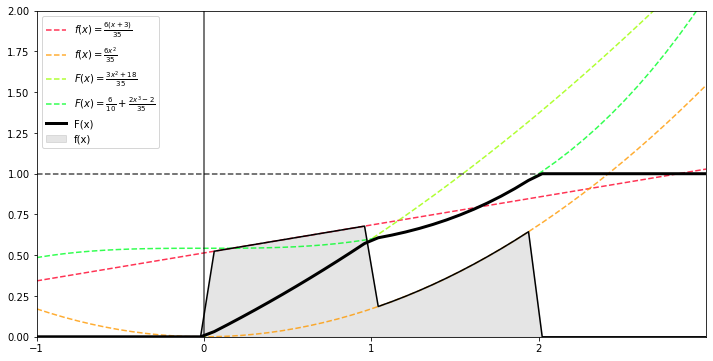

In [6]:
labels = [
    r'$f(x)= \frac{6(x+3)}{35}$',
    r'$f(x)= \frac{6x^{2}}{35}$',
    r'$F(x)= \frac{3x^{2}+18}{35}$',
    r'$F(x)= \frac{6}{10}+\frac{2x^{3}-2}{35}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-1,3)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [0,
       lambda x: (6*(x+3))/35,
       lambda x: (6*(x**2))/35,
       0]

conds = [x<=0,
        (x>0) & (x<=1),
        (x>1) & (x<2)]

cdf = [0,
       lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1),
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


We can see that the function is consistent with the hypothesis needed to apply the 
inverse transform method so we will use it again.
Now we calculate the inverse function of the cumulative probability function.

<ipython-input-5-b6f83351653b>:8: RuntimeWarning: invalid value encountered in sqrt
  cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
<ipython-input-5-b6f83351653b>:9: RuntimeWarning: invalid value encountered in sqrt
  lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),


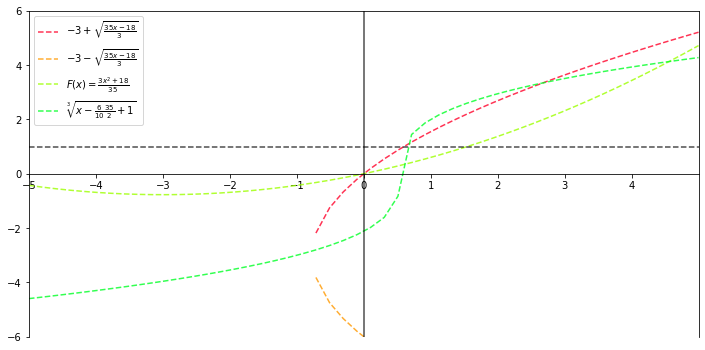

In [5]:
from math import sqrt
labels = [r'$-3 + \sqrt{\frac{35x-18}{3}}$',
          r'$-3 - \sqrt{\frac{35x-18}{3}}$',
          r'$F(x)= \frac{3x^{2}+18}{35}$',
          r'$\sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1}$',
          ]

cdfInverseCandidates = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: -3 - np.sqrt(35*x+27)/np.sqrt(3),
                        lambda x: (6/35)*((x**2)/2+x*3),
                        lambda x: np.cbrt((35*x-19)/2)]
x_lim = (-5,5)
y_lim = (-6,6)
plot(cdfInverseCandidates,x_lim,y_lim,labels,dist=False)

$
F^{-1}(x)= \left\{ \begin{array}{lcc}
             0 &   if  & x \leq 0 \\
             -3 + \sqrt{\frac{35x+27}{3}} & if & 0 \leq x \leq 1 
             \\ \sqrt[3]{x-\frac{6}{10}\frac{35}{2}+1} & if & 1 \leq x \leq 2 \\
             \\ 1 & otherwise
             \end{array}
   \right.
$


In [15]:
lims = [1,2]


cdfInverse = [lambda x: -3 + np.sqrt(35*x+27)/np.sqrt(3),
              lambda x: np.cbrt((35*x-19)/2)]
cdf = [lambda x: (6/35)*((x**2)/2+x*3),
       lambda x: (6/10)+(2/35)*((x**3)-1)]

exBgen = InverseTransform(cdfInverse,cdf,lims,pdf,conds,x_lim=(-1,3))

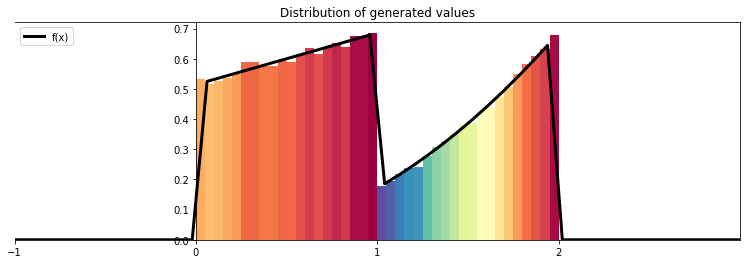

In [16]:
exBgen.plot(100000,figsize=(13,4),bins=40)

## C

$
f(x)= \left\{ \begin{array}{ll}
             \cfrac{exp(4x)}{4} & if &  - \infty < x \leq 0 \\
             \\ \cfrac{1}{4} & if & 0 \leq x \leq \cfrac{15}{4} \\
             \\ 0 & otherwise
             \end{array}
   \right.
$


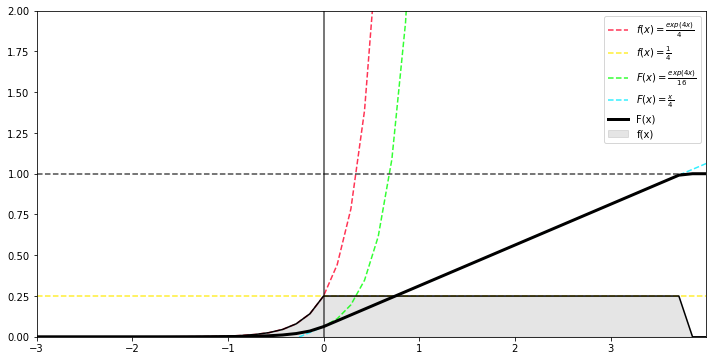

In [4]:
from math import exp
labels = [
    r'$f(x)= \frac{exp(4x)}{4}$',
    r'$f(x)= \frac{1}{4}$',
    r'$F(x)= \frac{exp(4x)}{16}$',
    r'$F(x)= \frac{x}{4}$'
          ]

# This is the linear space in which the conditions are applied 
x_lim = (-3,4)
y_lim = (0,2)

x = np.linspace(x_lim[0],x_lim[1])

pdf = [lambda x: np.exp(4*x)/4,
       lambda x: (0*x)+1/4,
       0]

conds = [x<0,
        (x>=0) & (x<=15/4),
        (x>15/4)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16,
       1]

fun_plot = plot(pdf,x_lim,y_lim,labels,cdf,conds)


The hyphotesis are fullfilled. So we are going to use the inverse method again

In [19]:
lims = [0,15/4]


cdfInverse = [lambda x: (1/4)*np.log(16*x),
              lambda x: (1/4)*(16*x-1)]

cdf = [lambda x: np.exp(4*x)/16,
       lambda x: x/4 + 1/16]

exCgen = InverseTransform(cdfInverse,cdf,lims,pdf,conds,x_lim=(-3,4))

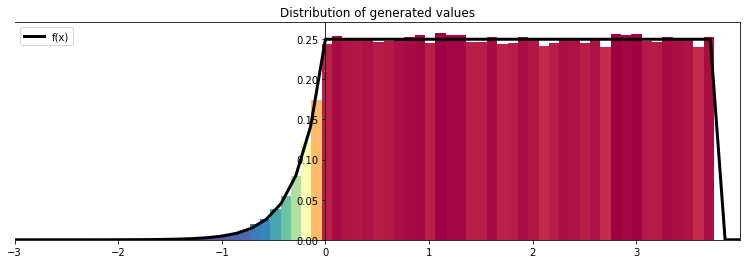

In [20]:
exCgen.plot(100000,(-3,4),figsize=(13,4),bins=60)

## Ex 2

# Pareto Distribution
Design a method to generate random variables Pareto distributed:
$$
f(x)= ax^{-(a+1)}    1 < x < \infty, a > 0
$$

$$
F(x)= 1-s^{-a}
$$

In [2]:
import numpy as np
from cvm.cvmgen import Pareto
from utilities.distPlot import plot

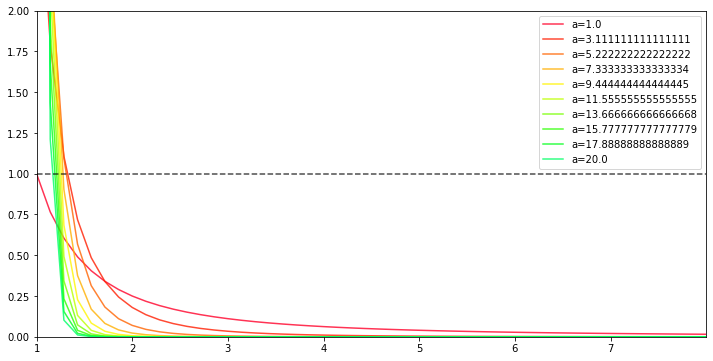

In [18]:
n = 3
x_lim = (1,8)
y_lim = (0,2)
paretos = [Pareto(i).pdf[1] for i in np.linspace(1,20,10)]
labels = [r'a={}'.format(i) for i in np.linspace(1,20,10)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-')

In [10]:
pareto = Pareto(2)

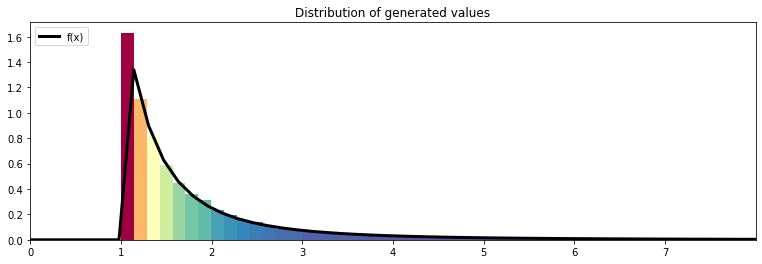

In [23]:
pareto.plot(10000,(0,8),figsize=(13,4),bins=700)

The mean of a Pareto random variable is
$$
E(X) = \cfrac{\alpha x_{m}}{\alpha-1}
$$

$ \varphi $

In [24]:
pareto.mean

1.9782880798821028

## Weibull
$$
f(x) = \cfrac{\beta}{\lambda} \cfrac{x}{\lambda}^{\beta - 1} exp(-(x/\lambda))^{\beta})
$$
$$
0 \leq x , \lambda > 0,  \beta > 0 
$$

$$
F(x) = 1 - e^{-(x/\lambda)^{k}}
$$

In [1]:
import numpy as np
from cvm.cvmgen import Weibull
from utilities.distPlot import plot

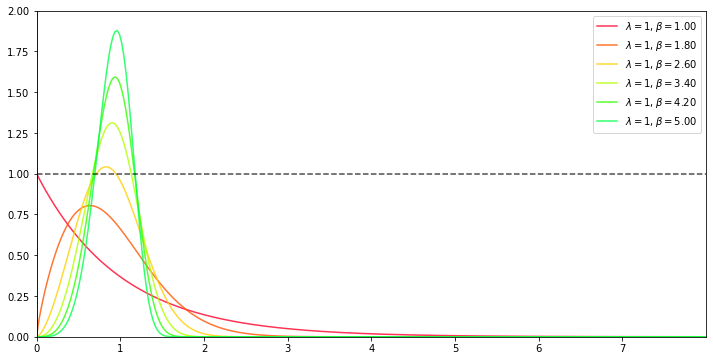

In [7]:
x_lim = (0,8)
y_lim = (0,2)
paretos = [Weibull(1,i,x_lim).pdf[1] for i in np.linspace(1,5,6)]
labels = [r'$\lambda = 1, \beta={:.2f}$'.format(i) for i in np.linspace(1,5,6)]
plot(paretos,x_lim,y_lim,labels,dist=False,ls='-',npoints=300)

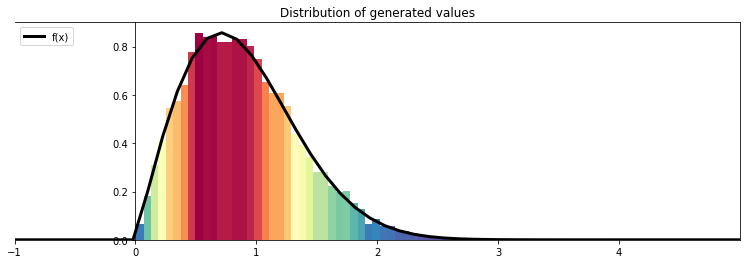

In [6]:
weibull = Weibull(1,2,x_lim=(-1,5))
weibull.plot(10000,figsize=(13,4),bins=50)

The mean of a Weibull variable is
$$
E(X) = \lambda \Gamma (1 + \cfrac{1}{\beta})
$$

where 
$$
\Gamma(x) = \int_{0}^{\infty} t^{z-1} e^{-t}dt
$$

*The $\Gamma$ function is an extension of the factorial to complex numbers. Cool huh?*

With $\lambda = 1 , \beta = 2$ our expected mean is:  
$$
E(X) = 1 * \Gamma (3/2) = 0.88
$$

In [3]:
weibull.mean

0.8858199587643648

## Erlang Distribution
$$
f(x) = \cfrac{x^{k-1}exp(-x/\mu)}{(k-1)!\mu^{k}}
$$
